# TMDB Movie Data: Are There Attributes That The Most Popular Movies Have In Common?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset chosen for this analysis is the TMDB set which is comprised of information about movies and their attributes.

With this dataset we will explore movies, their attributes, and whether these attributes correspond with a movies popularity among the audience. What movies produce the most profits and do they have anything in common with one another?

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#Load Data
df = pd.read_csv('tmdb-movies.csv')

# See what first few lines of data set look like
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning (Replace this with more specific notes!)

In [3]:
# How much data am I working with?
df.shape

(10866, 21)

There are 10,866 rows individual movies, and 21 columns of movie attributes.

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In order to determine popularity, I have decided to define success as movies that gained the most profit. Using popularity, vote counts, and vote average seem to have to great a range in the amounts. I have also noticed that the budget and revenue columns have minimum of $0.00 which seems odd.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are several columns in this data set in which not all will be used during this analysis. There is also a significant amount of null values missing which need to be resolved.

In [6]:
#Drop columns not to be used for analysis
drop_columns = ['id','imdb_id','popularity','cast','homepage',
         'director','tagline','overview','runtime',
         'production_companies','vote_count','vote_average',
        'budget_adj','revenue_adj', 'release_date']
df.drop(drop_columns, axis=1, inplace=True )

In [7]:
df.head()

,budget,revenue,original_title,keywords,genres,release_year
0,150000000,1513528810,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,2015
1,150000000,378436354,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,2015
2,110000000,295238201,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,2015
3,200000000,2068178225,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,2015
4,190000000,1506249360,Furious 7,car race|speed|revenge|suspense|car,Action|Crime|Thriller,2015


In [8]:
#Check for duplicates
df[df.duplicated()]

,budget,revenue,original_title,keywords,genres,release_year
2090,30000000,967000,TEKKEN,martial arts|dystopia|based on video game|mart...,Crime|Drama|Action|Thriller|Science Fiction,2010


Since there is a duplicate, we need to remove it.

In [9]:
#Remove duplicate entry
df.drop_duplicates(keep='first', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          10865 non-null  int64 
 1   revenue         10865 non-null  int64 
 2   original_title  10865 non-null  object
 3   keywords        9372 non-null   object
 4   genres          10842 non-null  object
 5   release_year    10865 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 594.2+ KB


Columns for keywords and genres are missing values. Those null values will stay as I can still determine their popularity.
However, the budgets and revenues with 0 should be handled. 

In [11]:
#Seeing how many budget entries are 0
df[df.budget==0] 

,budget,revenue,original_title,keywords,genres,release_year
30,0,29355203,Mr. Holmes,london|detective|sherlock holmes,Mystery|Drama,2015
36,0,22354572,Solace,thriller|serial killer|psychic|fbi agent|intrigue,Crime|Drama|Mystery,2015
72,0,45895,Beyond the Reach,desert|hunting,Thriller,2015
74,0,0,Mythica: The Darkspore,sword|magic|sorcery|necromancer|woman director,Action|Adventure|Fantasy,2015
75,0,0,Me and Earl and the Dying Girl,tattoo|high school|leukemia|friends|parody,Comedy|Drama,2015
...,...,...,...,...,...,...
10860,0,0,Carry On Screaming!,monster|carry on|horror spoof,Comedy,1966
10861,0,0,The Endless Summer,surfer|surfboard|surfing,Documentary,1966
10862,0,0,Grand Prix,car race|racing|formula 1,Action|Adventure|Drama,1966
10863,0,0,Beregis Avtomobilya,car|trolley|stealing car,Mystery|Comedy,1966


In [12]:
#Seeing how many revenue entries are 0
df[df.revenue==0]

,budget,revenue,original_title,keywords,genres,release_year
48,30000000,0,Wild Card,gambling|bodyguard|remake,Thriller|Crime|Drama,2015
67,20000000,0,Survivor,new year's eve|fire|showdown|terrorist|embassy,Crime|Thriller|Action,2015
74,0,0,Mythica: The Darkspore,sword|magic|sorcery|necromancer|woman director,Action|Adventure|Fantasy,2015
75,0,0,Me and Earl and the Dying Girl,tattoo|high school|leukemia|friends|parody,Comedy|Drama,2015
92,0,0,Mythica: The Necromancer,sword|magic|sorcery|necromancer,Fantasy|Action|Adventure,2015
...,...,...,...,...,...,...
10861,0,0,The Endless Summer,surfer|surfboard|surfing,Documentary,1966
10862,0,0,Grand Prix,car race|racing|formula 1,Action|Adventure|Drama,1966
10863,0,0,Beregis Avtomobilya,car|trolley|stealing car,Mystery|Comedy,1966
10864,0,0,"What's Up, Tiger Lily?",spoof,Action|Comedy,1966


Over half of the data seems to be missing either budget information, revenue information or both. These will be replaced with their median values.

In [13]:
#Replace all 0's with null values
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)
#df['budget','revenue'] = df['budget','revenue'].replace(0, np.NaN)

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          5169 non-null   float64
 1   revenue         4849 non-null   float64
 2   original_title  10865 non-null  object 
 3   keywords        9372 non-null   object 
 4   genres          10842 non-null  object 
 5   release_year    10865 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 594.2+ KB


In [15]:
#Replace nulls with median
df.fillna(df.median(), inplace=True)

<ipython-input-15-fb46ab01b9da>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10865 non-null  float64
 1   revenue         10865 non-null  float64
 2   original_title  10865 non-null  object 
 3   keywords        9372 non-null   object 
 4   genres          10842 non-null  object 
 5   release_year    10865 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 594.2+ KB


In [17]:
# Turn off scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df.describe()

,budget,revenue,release_year
count,10865.00,10865.00,10865.00
mean,23536573.22,57464091.59,2001.32
std,27696280.96,111967359.47,12.81
min,1.00,2.00,1960.00
25%,17000000.00,31853080.00,1995.00
50%,17000000.00,31853080.00,2006.00
75%,17000000.00,31853080.00,2011.00
max,425000000.00,2781505847.00,2015.00


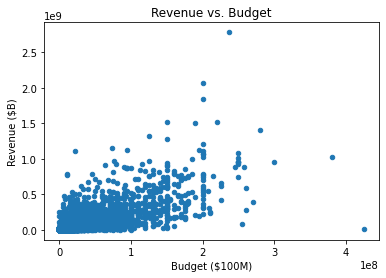

In [18]:
df.plot.scatter(x='budget', y='revenue', title ='Revenue vs. Budget')
 
plt.xlabel('Budget ($100M)')
plt.ylabel('Revenue ($B)')

plt.show()


It looks possible that a higher budget can poduce a higher revenue but, the trend is not showing a significant correlation between budget and revenue. 

Now that the budget and revenue columns have been cleaned, we can take another look at the data and then calculate the profits.

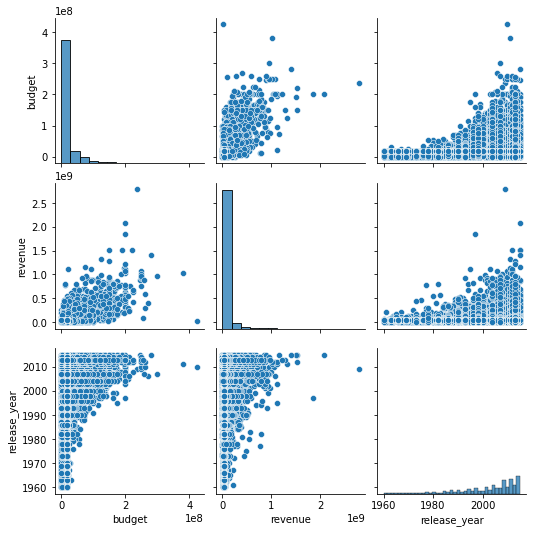

In [19]:
#Take a look at relationships between data in  clean dataset 
sns.pairplot(df)

Looking at the histograms, budget and revenue are skewed heavily to the left.

Looking at the scatter plots, there seems to be a positive correlation between budget, revenue, and release years. As time passes budgets and revenue seem to rise as well.

The plots for the release year appear to show that as time progressed, the amount of movies increased as well as the budget and revenue amounts.

In [20]:
#Create new profit column where profit = revenue - budget
df['profit'] = df['revenue'] - df['budget']

<a id='eda'></a>
## Exploratory Data Analysis

### Is There A Significant Difference Between The Movies With The Highest Profits In Comparison To All Other Movies?

In [21]:
#Get an idea of what profit column consists of for all data
df.describe()


,budget,revenue,release_year,profit
count,10865.00,10865.00,10865.00,10865.00
mean,23536573.22,57464091.59,2001.32,33927518.37
std,27696280.96,111967359.47,12.81,94404925.05
min,1.00,2.00,1960.00,-413912431.00
25%,17000000.00,31853080.00,1995.00,11853080.00
50%,17000000.00,31853080.00,2006.00,14853080.00
75%,17000000.00,31853080.00,2011.00,23653080.00
max,425000000.00,2781505847.00,2015.00,2544505847.00


In [22]:
df['profit'].mean()

33927518.36778647

So, the mean profit when looking at all the movies in the data set is 33,927,518 dollars. I wonder if the top 100 movies by profit are higher than this amount.

In [23]:
#Retrieve top 100
top_100_by_profit=df.sort_values(by='profit').tail(100)

In [24]:
#Get an idea of what data in top 100 movies looks like
top_100_by_profit.describe()


,budget,revenue,release_year,profit
count,100.00,100.00,100.00,100.00
mean,145458500.00,894017907.02,2007.26,748559407.02
std,70826024.60,322648939.50,7.81,302714962.66
min,10500000.00,538400000.00,1977.00,489016565.00
25%,93750000.00,709798041.50,2004.00,569441935.50
50%,150000000.00,807963716.50,2009.50,660413731.00
75%,200000000.00,959050000.00,2013.00,799844502.25
max,380000000.00,2781505847.00,2015.00,2544505847.00


In [25]:
top_100_by_profit['profit'].mean()

748559407.02

In [26]:
top_100_by_profit['profit'].min()


489016565.0

The top 100 movies' minimum profit amount of 489,016,565 dollars and a mean of 748,559,407 dollars are much higher than the mean of all the movies together. 

### Does a Particular Genre Appear More in the Top 100 Movies?

In [27]:
#Check type of genre column
type(df['genres'][0])

str

In [28]:
#See what data in a field looks like 
print(df['genres'][0])

Action|Adventure|Science Fiction|Thriller


In [29]:
# Separate the words and see which ones are used most to
#describe top 100 movies genres
genres_count = pd.Series(np.concatenate([str(x).upper()
                                         .strip().split('|')for x in top_100_by_profit
                                         .genres])).value_counts()

In [30]:
print(genres_count)

ADVENTURE          73
ACTION             52
FANTASY            39
SCIENCE FICTION    32
FAMILY             31
ANIMATION          19
THRILLER           18
DRAMA              15
COMEDY             15
ROMANCE             9
CRIME               7
MYSTERY             5
WAR                 1
dtype: int64


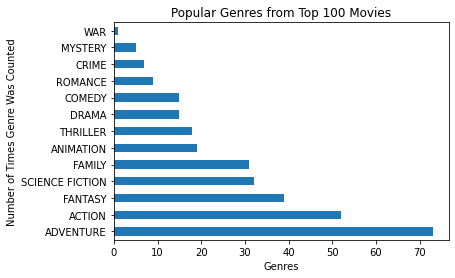

In [31]:
#Create bar graph
ax = genres_count.plot(kind ='barh')
#Label the graph
ax.set_title('Popular Genres from Top 100 Movies')
ax.set_xlabel('Genres')
ax.set_ylabel('Number of Times Genre Was Counted')

plt.show()


Adventure is the most common genre in the top 100 movies followed by action.

### Do Particular Keywords Appear More in the Top 100 Movies?

In [32]:
# Separate the words and see which ones are used most to
#describe top 100 movies keywords
keywords_count = pd.Series(np.concatenate([str(x).upper()
                                         .strip().split('|')for x 
                                         in top_100_by_profit.keywords])).value_counts()


In [33]:
print(keywords_count)

MARVEL COMIC          9
SEQUEL                9
BASED ON NOVEL        9
ORCS                  6
3D                    6
                     ..
ASTRONAUT             1
TRAPPED IN SPACE      1
HALLUCINATION         1
FEMALE PROTAGONIST    1
SOCIETY               1
Length: 339, dtype: int64


In [34]:
#Get top 10 words as there are 339 different words
top_keywords=keywords_count.nlargest(10)

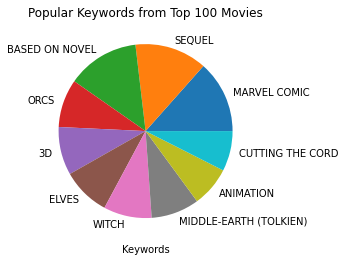

In [35]:
#Create pie chart
ax = top_keywords.plot(kind='pie')
#Title chart
#Create bar graph
#ax = genres_count.plot(kind ='bar')
#Label the graph
ax.set_title('Popular Keywords from Top 100 Movies')
ax.set_xlabel('Keywords')
ax.set_ylabel('')

plt.show()


Audiences seem to see more movies that are based on a novel, from a marvel comic, or a sequel to another movie.

<a id='conclusions'></a>
## Conclusions

After analyzing the movie data set for trends concerning profits, genres, and keywords, there does seem to be some insights to be gained.

There is a difference in profits made by all movies in comparison to the top 100 movies with the highest profits. The difference in means was more than 700,000,000 dollars where the top 100 movies profited more than the majority of the other movies.

The data also shows that out of the top 100 movies, adventure was the most popular genre and 'based on a novel', 'marvel comic', 'sequel' were the most common keywords.

## Limitations

One of the limitations of this analysis was the budget and revenue amounts which had more than half of the values as 0. If they were deleted, there would have been less that half of the dataset to work with. 

There were also some missing values from the keywords and genres columns. 

This sample dataset of movies includes the years of 1960 to 2015 so, it is unknown whether the audience would still be drawn to the same types of movies in the years 2016 to 2020. The top 100 movies could be completely different.


An additional limitation of this analysis was the lack of a statistical test to test any of the results found.

## Resource List 
>https://www.storybench.org/getting-started-with-python-and-jupyter-notebooks-for-data-analysis/
>
>https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
>
>https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/
>
>https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart